# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Set output to non-scroll

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# load signnames
signnames=pd.read_csv('signnames.csv')

# Show the signs & names
signnames['SignName']

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                             N

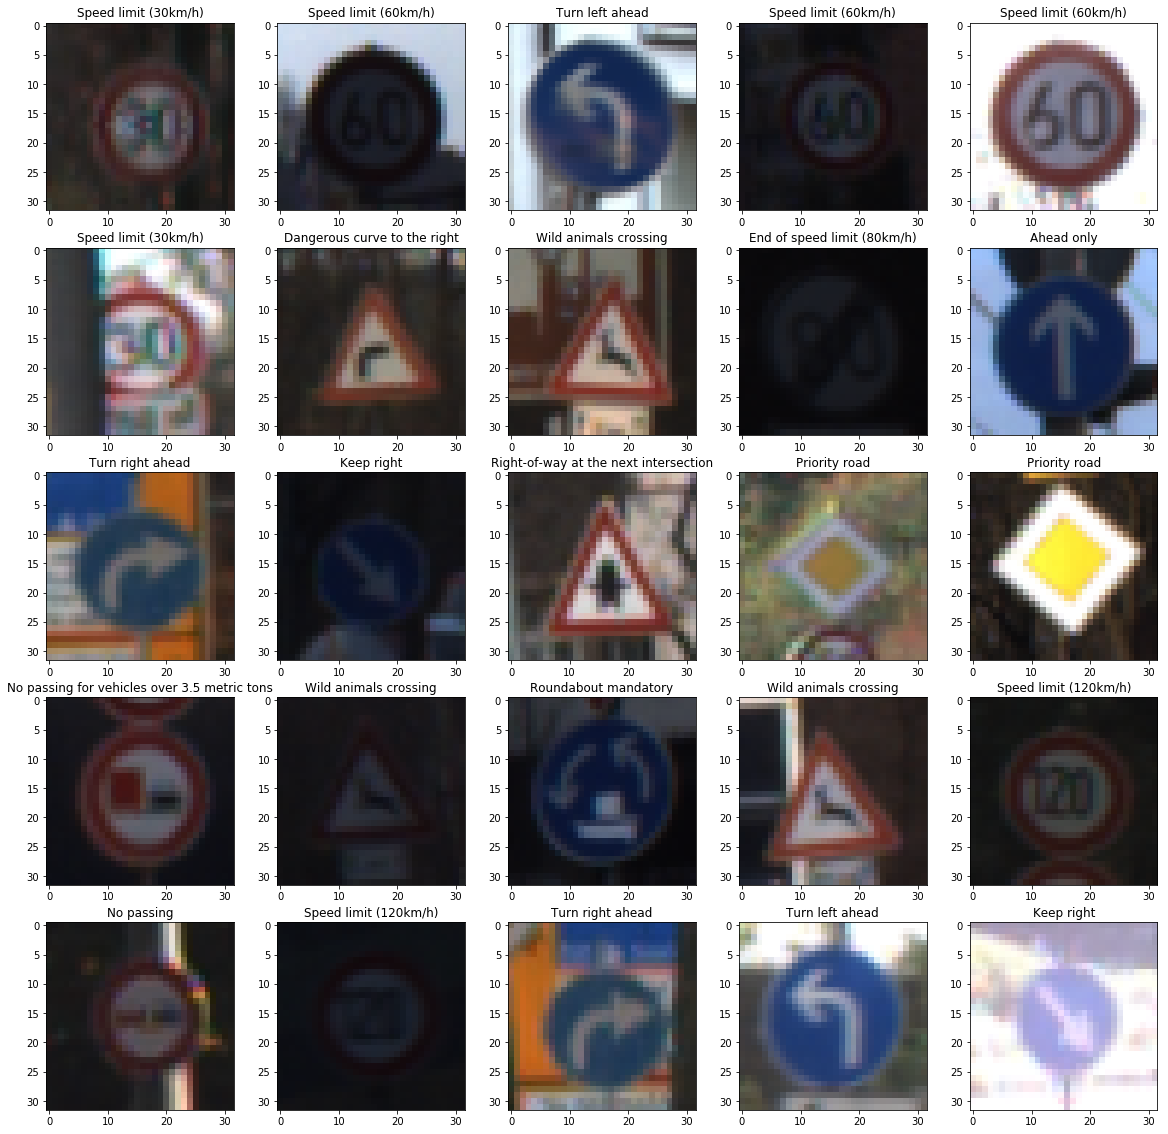

In [5]:
# Show some random training images with labels

import random

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    r = random.randint(0, n_train)
    plt.imshow(X_train[r])
    plt.title(signnames['SignName'][y_train[r]])

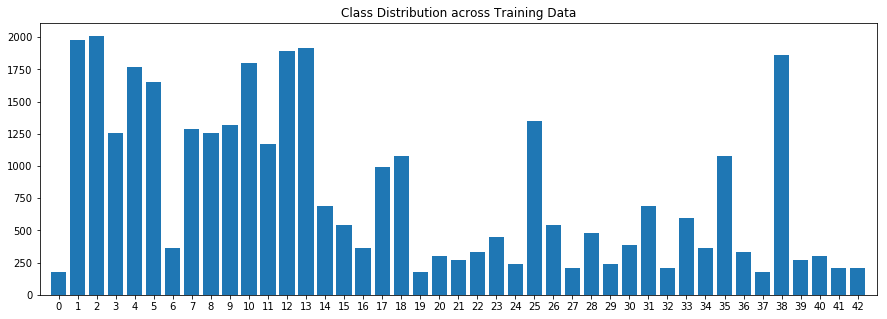

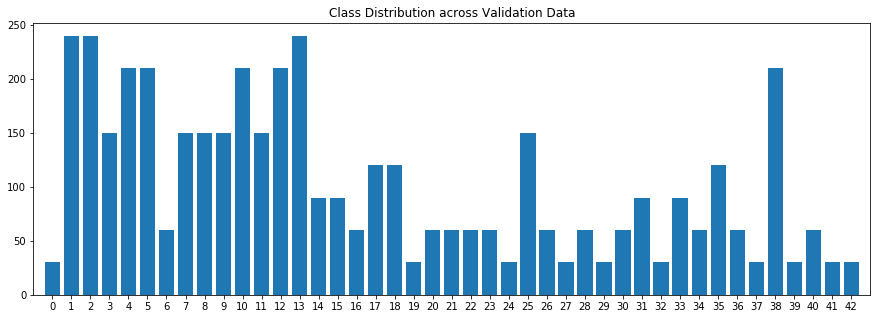

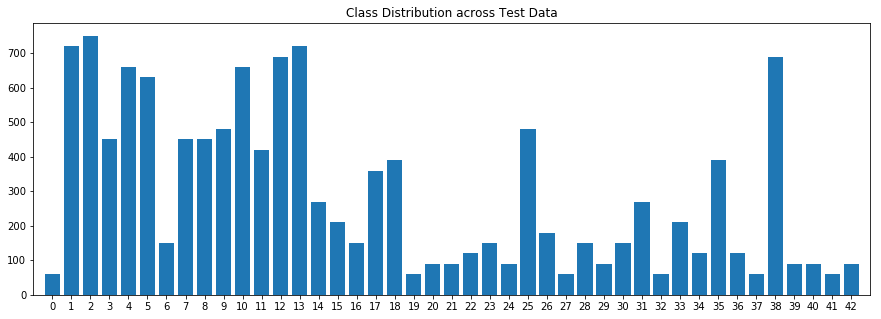

In [6]:
def plot_distribution(dataset, title):
    """
    Plot distribution of dataset
    """
    # Count frequency of each label
    labels, counts = np.unique(dataset, return_counts=True)

    # Plot the histogram
    plt.figure(figsize=(15,5))
    axes = plt.gca()
    axes.set_xlim([-1,43])

    plt.bar(labels, counts, tick_label=labels, width=0.8, align='center')
    plt.title(title)
    plt.show()
    
### Plot the training, validation, and test sets for comparison
plot_distribution(y_train, 'Class Distribution across Training Data')
plot_distribution(y_valid, 'Class Distribution across Validation Data')
plot_distribution(y_test, 'Class Distribution across Test Data')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import PIL
from PIL import Image

def normalize_images(images):
    """
    Normalize images to range -1..1
    """
    return (images - 128.) / 128.

def resize_images(images, size=(32,32,3)):
    """
    Resize an array of images.
    """
    return np.array([resize_image(image, size) for image in images])
        
def resize_image(image, size=(32,32,3)):
    """
    Resize image.
    By defalt resize to 32x32, which is the size that the problem dataset is rendered in.
    """
    if len(size) != 3:
        # Silently fix
        size=(32,32,3)
    if image.shape == size:
        return image
    im = Image.fromarray(image).resize((size[0], size[1]), Image.ANTIALIAS)
    resized = np.array(im.getdata()).reshape(size[0], size[1], size[2])
    return resized

In [8]:
X_train_r = resize_images(X_train)
X_test_r = resize_images(X_test)
X_valid_r = resize_images(X_valid)

X_train_p = normalize_images(X_train_r)
X_test_p = normalize_images(X_test_r)
X_valid_p = normalize_images(X_valid_r)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Import TF/Keras
import tensorflow as tf
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot

# Use for model display
from IPython.display import SVG

Using TensorFlow backend.


In [10]:
# Convert to one hot encoding using Keras utility function
y_train_o = to_categorical(y_train, n_classes)
y_test_o = to_categorical(y_test, n_classes)
y_valid_o = to_categorical(y_valid, n_classes)

In [11]:
# We use a relatively simple convnet model designed for CIFAR-10, which has 32x32 input images

def make_model(input_shape, batch_norm=False):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, (3, 3)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,
                    kernel_regularizer=keras.regularizers.l2(0.001)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_classes,
                    kernel_regularizer=keras.regularizers.l2(0.001)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Activation('softmax'))

    # Use Adam optimizer
    opt=keras.optimizers.Adam()

    # Use cross entropy loss for one hot
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    return model

In [12]:
def plot_training_history(history):
    """
    Plot the Keras training history.
    """
    # Accuracy
    plt.figure(figsize=(10,5))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

    # Loss
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

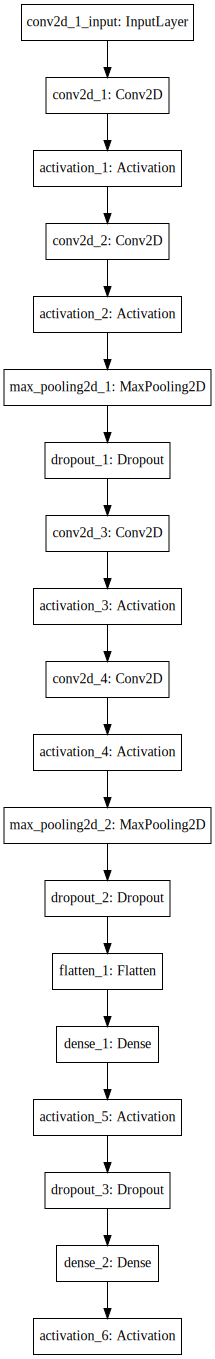

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

### First, try without batch norm

EPOCHS = 30
BATCH_SIZE = 128
BATCH_NORM = False

# Create model
model1=make_model(image_shape, BATCH_NORM)

# Show model architecture
SVG(model_to_dot(model1).create(prog='dot', format='svg'))

In [14]:
# Train model

history1=model1.fit(X_train_p, y_train_o,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_data=(X_valid_p, y_valid_o),
                           shuffle=True,
                           callbacks=[
#                               EarlyStopping(min_delta=0.0005, patience=5)
                           ])

Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 3s - loss: 1.7672 - acc: 0.6180 - val_loss: 0.6844 - val_acc: 0.8977
Epoch 2/30
34799/34799 [==============================] - 2s - loss: 0.5146 - acc: 0.9399 - val_loss: 0.4679 - val_acc: 0.9488
Epoch 3/30
34799/34799 [==============================] - 3s - loss: 0.3735 - acc: 0.9669 - val_loss: 0.3751 - val_acc: 0.9655
Epoch 4/30
34799/34799 [==============================] - 3s - loss: 0.3094 - acc: 0.9763 - val_loss: 0.3564 - val_acc: 0.9615
Epoch 5/30
34799/34799 [==============================] - 2s - loss: 0.2890 - acc: 0.9778 - val_loss: 0.3207 - val_acc: 0.9667
Epoch 6/30
34799/34799 [==============================] - 3s - loss: 0.2723 - acc: 0.9805 - val_loss: 0.3340 - val_acc: 0.9658
Epoch 7/30
34799/34799 [==============================] - 3s - loss: 0.2627 - acc: 0.9811 - val_loss: 0.2936 - val_acc: 0.9730
Epoch 8/30
34799/34799 [==============================] - 3s -

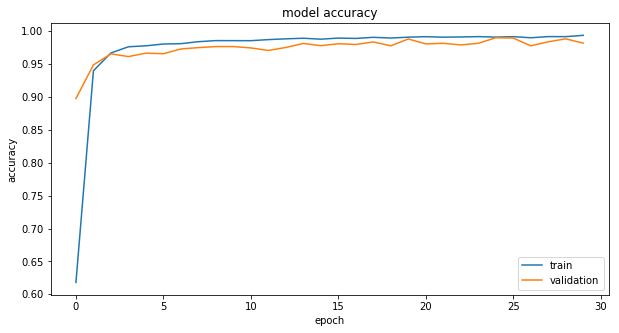

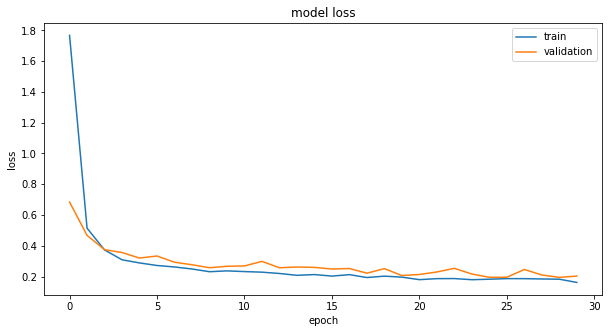

In [15]:
# Plot training history

plot_training_history(history1)

In [20]:
# Report accuracy on test set

scores1 = model1.evaluate(X_test_p, y_test_o)
print()
print(scores1)

12448/12630 [============================>.] - ETA: 0s
[0.24534951352167017, 0.97688044343594982]


### Now try with batch normalization

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
__________

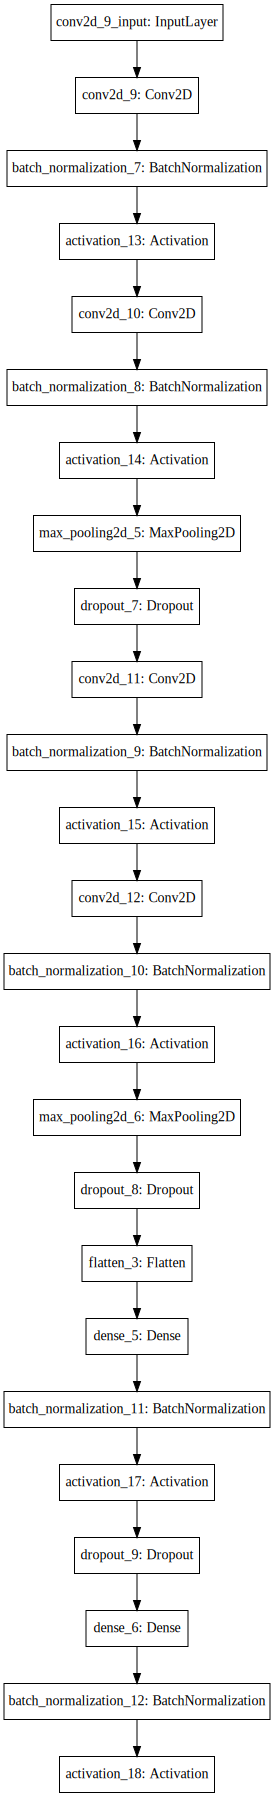

In [21]:
EPOCHS = 30
BATCH_SIZE = 128
BATCH_NORM = True

# Create model
model2=make_model(image_shape, BATCH_NORM)

# Show model architecture
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [22]:
# Train model

history2=model2.fit(X_train_p, y_train_o,
                       batch_size=BATCH_SIZE,
                       epochs=EPOCHS,
                       validation_data=(X_valid_p, y_valid_o),
                       shuffle=True,
                       callbacks=[
                           EarlyStopping(min_delta=0.0001, patience=5)
                       ])


Train on 34799 samples, validate on 4410 samples
Epoch 1/30
34799/34799 [==============================] - 5s - loss: 2.1239 - acc: 0.7493 - val_loss: 1.7419 - val_acc: 0.8245
Epoch 2/30
34799/34799 [==============================] - 5s - loss: 0.7638 - acc: 0.9694 - val_loss: 0.6204 - val_acc: 0.9576
Epoch 3/30
34799/34799 [==============================] - 5s - loss: 0.4367 - acc: 0.9839 - val_loss: 0.3945 - val_acc: 0.9771
Epoch 4/30
34799/34799 [==============================] - 5s - loss: 0.3292 - acc: 0.9875 - val_loss: 0.2945 - val_acc: 0.9868
Epoch 5/30
34799/34799 [==============================] - 5s - loss: 0.2747 - acc: 0.9905 - val_loss: 0.2868 - val_acc: 0.9816
Epoch 6/30
34799/34799 [==============================] - 5s - loss: 0.2379 - acc: 0.9922 - val_loss: 0.2316 - val_acc: 0.9855
Epoch 7/30
34799/34799 [==============================] - 5s - loss: 0.2273 - acc: 0.9917 - val_loss: 0.2420 - val_acc: 0.9855
Epoch 8/30
34799/34799 [==============================] - 5s -

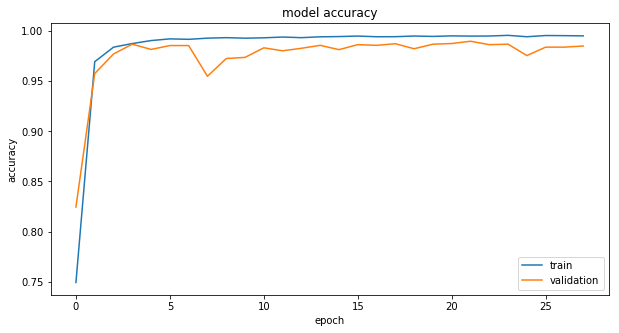

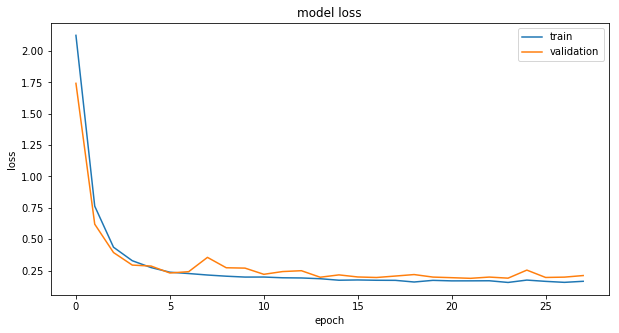

In [23]:
# Plot training history

plot_training_history(history2)

In [24]:
# Find accuracy on test set

scores2 = model2.evaluate(X_test_p, y_test_o)
print()
print(scores2)

12352/12630 [============================>.] - ETA: 0s
[0.24694069616396278, 0.97600950123484131]


### Try data augmentation

Keras provides built-in facilities for data augmentation for image data. This includes flipping and shifting.

We try out training the model with data augmentation.

In [25]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train_p)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

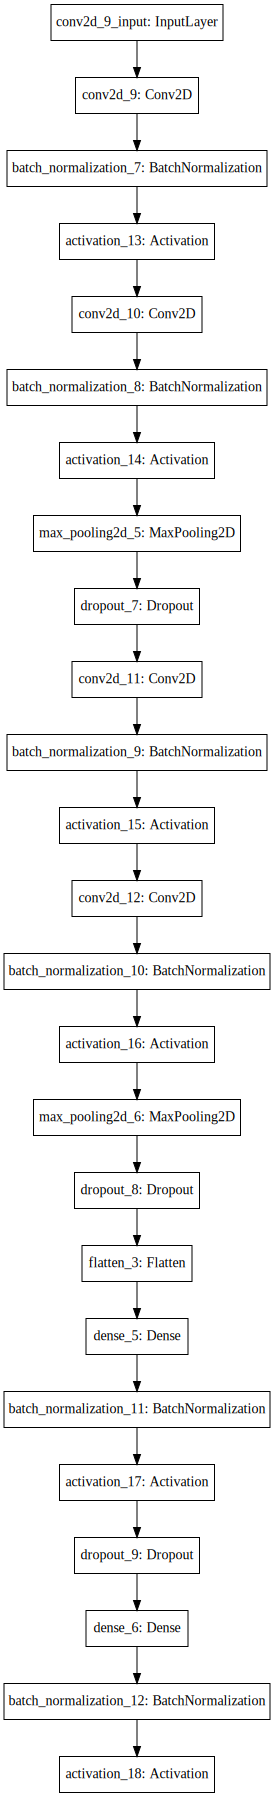

In [26]:
# Create model
model3=make_model(image_shape)

# Show model architecture
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [27]:
#  Train the model

#  In practice, we find that data augmentation requires an order of magnitude 
#  more epochs for roughly equivalent results
EPOCHS=50

history3=model3.fit_generator(datagen.flow(X_train_p, y_train_o,
                                batch_size=BATCH_SIZE),
                                steps_per_epoch=X_train_p.shape[0] // BATCH_SIZE,
                                epochs=EPOCHS,
                                validation_data=(X_valid_p, y_valid_o),
                                callbacks=[
#                                    EarlyStopping(min_delta=0.001, patience=5)
                                ])  


Epoch 1/50
271/271 [==============================] - 6s - loss: 2.5315 - acc: 0.3767 - val_loss: 1.4123 - val_acc: 0.6438
Epoch 2/50
271/271 [==============================] - 6s - loss: 1.1771 - acc: 0.7345 - val_loss: 0.9492 - val_acc: 0.8184
Epoch 3/50
271/271 [==============================] - 6s - loss: 0.8601 - acc: 0.8377 - val_loss: 0.8083 - val_acc: 0.8633
Epoch 4/50
271/271 [==============================] - 6s - loss: 0.7315 - acc: 0.8751 - val_loss: 0.7700 - val_acc: 0.8728
Epoch 5/50
271/271 [==============================] - 6s - loss: 0.6697 - acc: 0.8924 - val_loss: 0.6759 - val_acc: 0.8930
Epoch 6/50
271/271 [==============================] - 6s - loss: 0.6018 - acc: 0.9091 - val_loss: 0.6914 - val_acc: 0.8993
Epoch 7/50
271/271 [==============================] - 6s - loss: 0.5724 - acc: 0.9174 - val_loss: 0.7607 - val_acc: 0.8703
Epoch 8/50
271/271 [==============================] - 6s - loss: 0.5475 - acc: 0.9221 - val_loss: 0.6601 - val_acc: 0.8952
Epoch 9/50
271/2

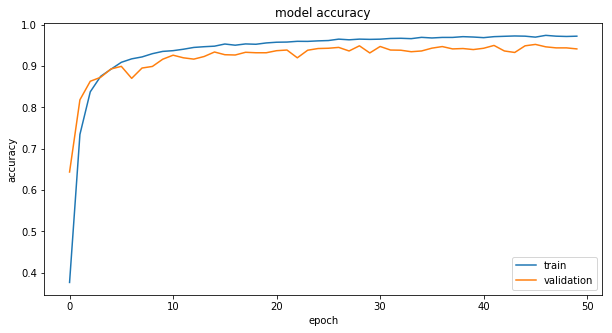

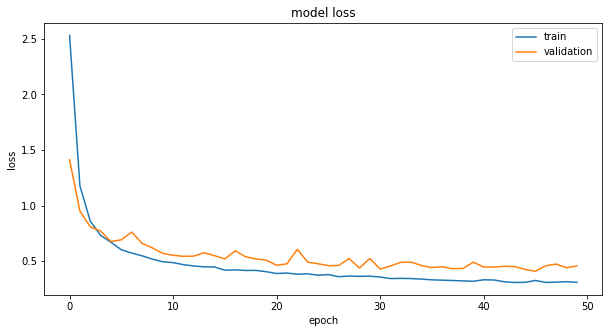

In [28]:
# Plot training history

plot_training_history(history3)

In [29]:
# Find accuracy on test set

scores3 = model3.evaluate(X_test_p, y_test_o)
print()
print(scores3)

12630/12630 [==============================] - 0s     

[0.4461749592378606, 0.94220110856627814]


### Analyze prediction errors

We take each model and analyze the cases where it failed to product correct prediction in test set.

In [30]:
# Find all the wrong predictions by model
errors1 = y_test[np.nonzero(model1.predict_classes(X_test_p) != y_test)]
errors2 = y_test[np.nonzero(model2.predict_classes(X_test_p) != y_test)]
errors3 = y_test[np.nonzero(model3.predict_classes(X_test_p) != y_test)]

12630/12630 [==============================] - 0s     


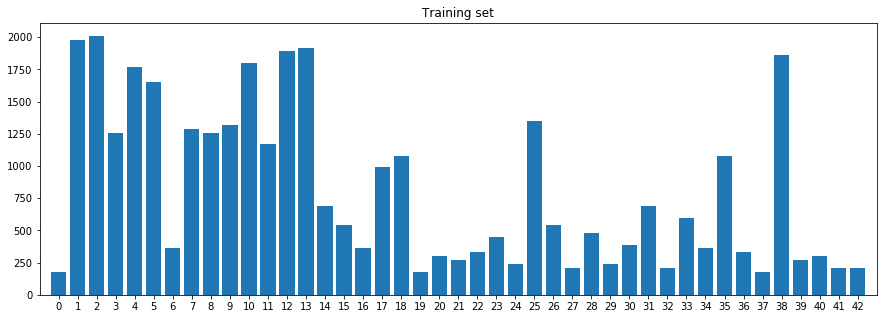

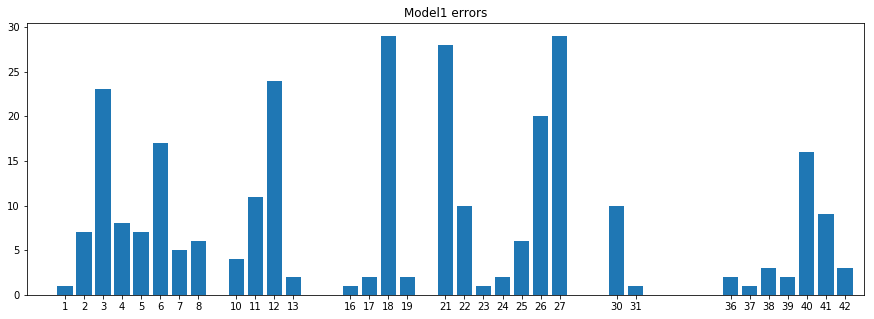

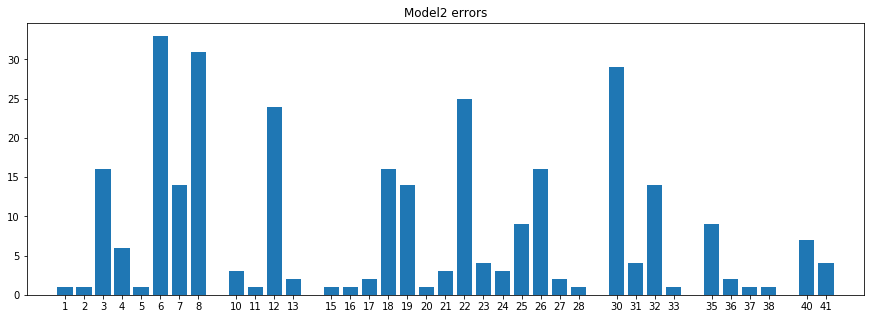

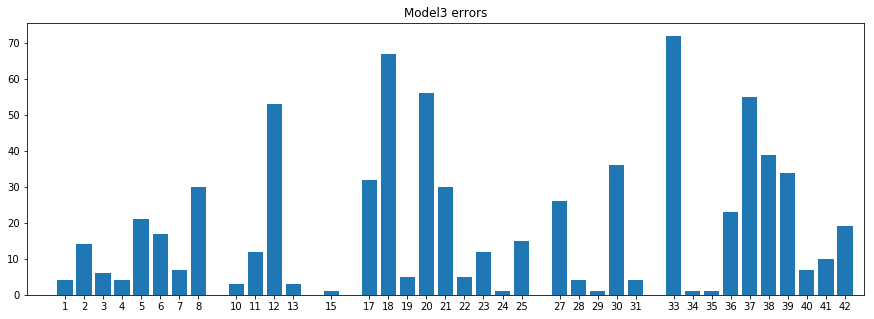

In [31]:
# Plot the distribution of errors for each model, compared to distribution of training set
plot_distribution(y_train, 'Training set')
plot_distribution(errors1, 'Model1 errors')
plot_distribution(errors2, 'Model2 errors')
plot_distribution(errors3, 'Model3 errors')

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

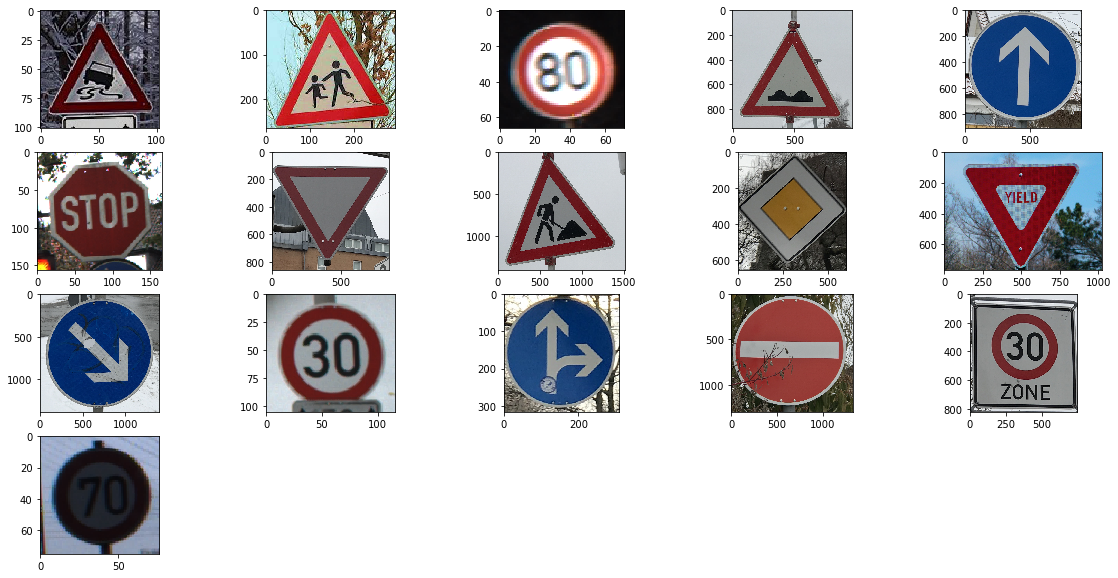

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

X_samples = np.array([mpimg.imread(os.path.join("sample-images", file))[:,:,:3]
                 for file in os.listdir("sample-images")])

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(X_samples):
    plt.subplot(len(X_samples) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [34]:
# These are the correct labels for the new images

y_samples = np.array([
    23,
    28,
    5,
    22,
    35,
    14,
    13,
    25,
    12,
    13,
    38,
    1,
    36,
    17,
    1,
    4
])

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# preprocess

X_samples_r = resize_images(X_samples)
X_samples_p = normalize_images(X_samples_r)

In [36]:
### Compute the predictions

### We use model2 as it had the hightest test accuracy

predictions=model2.predict_classes(X_samples_p)
probs=model2.predict(X_samples_p)

16/16 [==============================] - 0s


### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# To calculate accuracy:
# 1. Compare predictions to the correct classification with numpy
# 2. Count number of True results ("nonzero")
# 3. Divide by number of samples.  Note we don't check for divide by zero as we know we have non-zero sample set.
accuracy = np.count_nonzero(predictions == y_samples) / len (predictions)

print('The accuracy is {0}%'.format(accuracy * 100))

The accuracy is 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

# Get the column positions of the top 5 probabilities.
# This is done by sorting the probabilities and selecting the top 5.
# This could be done slightly faster by not sorting the full set of 43 classes but not fast enough to make a difference
top5_cols = np.argsort(probs)[:,-5:]

In [39]:
# Create function to plot & print the top 5 probabilities

import matplotlib.gridspec as gridspec

def plot_prediction_probs(image, probs, top5, index):
    """
    Plot the predictions of the classifier.
    'image' is the image being classified.
    'probs' is the full tensor of softmax probabilities.
    'top5' is a tensor of the indices of the top 5 probabilities.
    'index' is the current sample.
    """
    # Create grid
    plt.figure(figsize=(6,2))
    gridspec.GridSpec(1,2)
    
    # Show the image
    plt.subplot2grid((1,2), (0,0), colspan=1, rowspan=1)
    plt.imshow(image)
    plt.axis('off')
    
    # Show the probaility bar chart with labels
    ax = plt.subplot2grid((1,2), (0,1), colspan=1, rowspan=1)
    plt.barh(np.arange(5)+0.5, probs[index][top5_cols[index]], align='center')
    plt.yticks(np.arange(5)+0.5, signnames['SignName'][top5_cols[index]])
    for i, v in enumerate(probs[index][top5_cols[index]]):
        ax.text(3.0, i + .25, str(v), color='blue')
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    plt.show()

### Display each image with probabilities and labels of the top 5 predictions

We find that the trained model is highly confident of its classifications.

Many of the predictions are effectively 1.0.

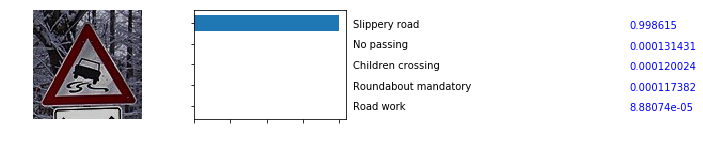

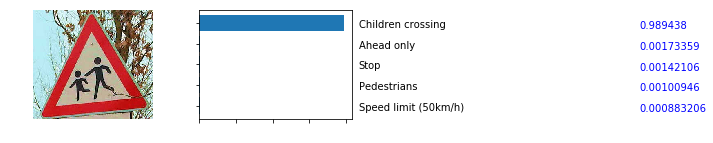

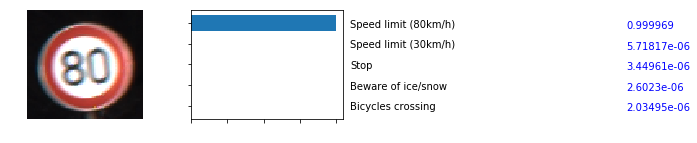

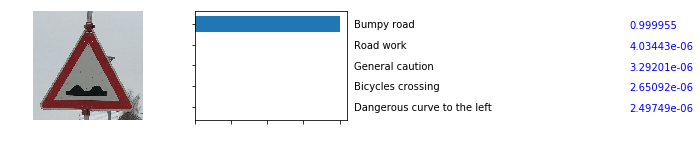

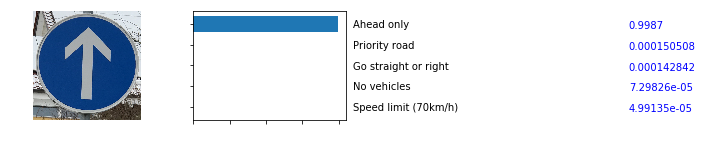

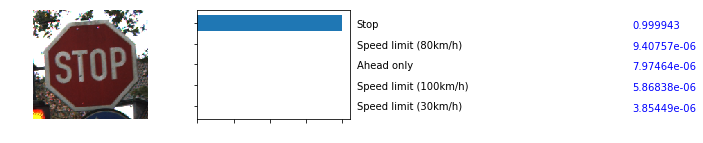

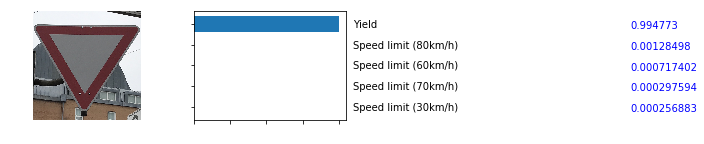

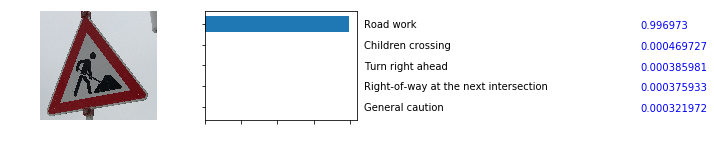

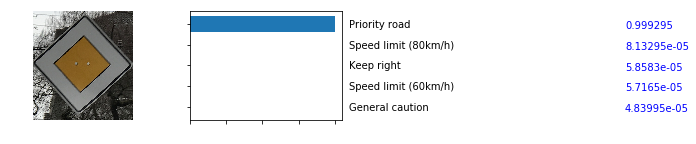

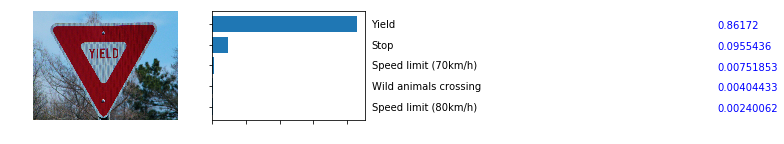

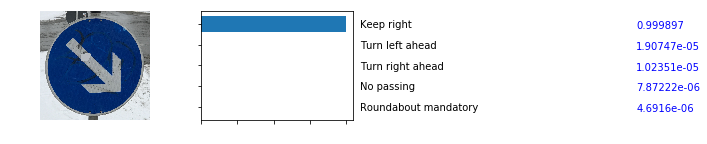

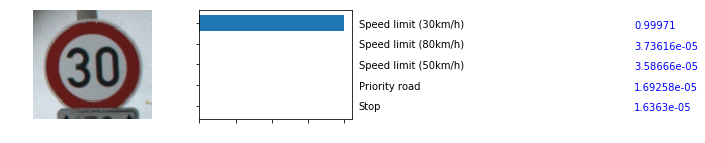

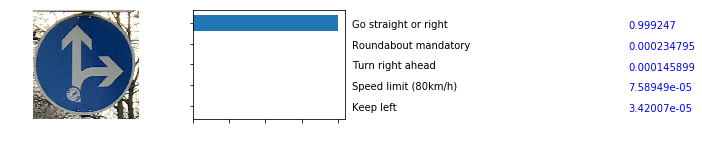

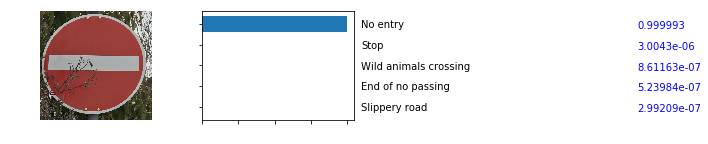

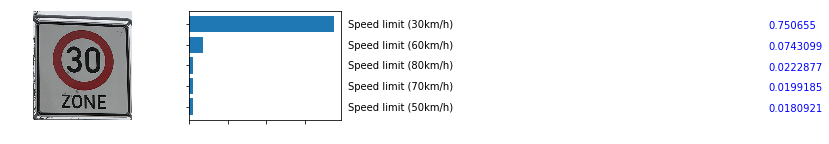

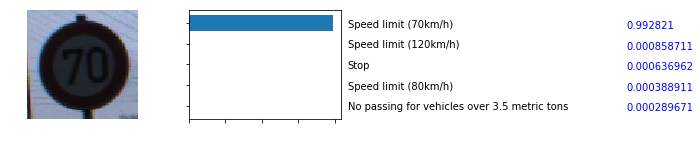

In [40]:
for i in range(X_samples.shape[0]):
    plot_prediction_probs(X_samples[i], probs, top5_cols, i)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [41]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [42]:
# activation display code adapted from https://github.com/philipperemy/keras-visualize-activations/ (Apache License)

import keras.backend as K

def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    #print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
    return activations


def plot_activation(activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    """
    Slight modificiation of the provided feature map display function.
    """
    if len(activation.shape) != 4:
        return
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.axis('off')
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")


In [43]:
# Slippery road
acts0=get_activations(model2, X_samples_p[0:1], True)

(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 32, 32, 32)
(1, 30, 30, 32)
(1, 30, 30, 32)
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 15, 15, 32)
(1, 15, 15, 64)
(1, 15, 15, 64)
(1, 15, 15, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 13, 13, 64)
(1, 6, 6, 64)
(1, 6, 6, 64)
(1, 2304)
(1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 43)
(1, 43)
(1, 43)


In [44]:
# Children crossing
acts1=get_activations(model2, X_samples_p[1:2], False)

In [45]:
# 80 km
acts2=get_activations(model2, X_samples_p[2:3], False)

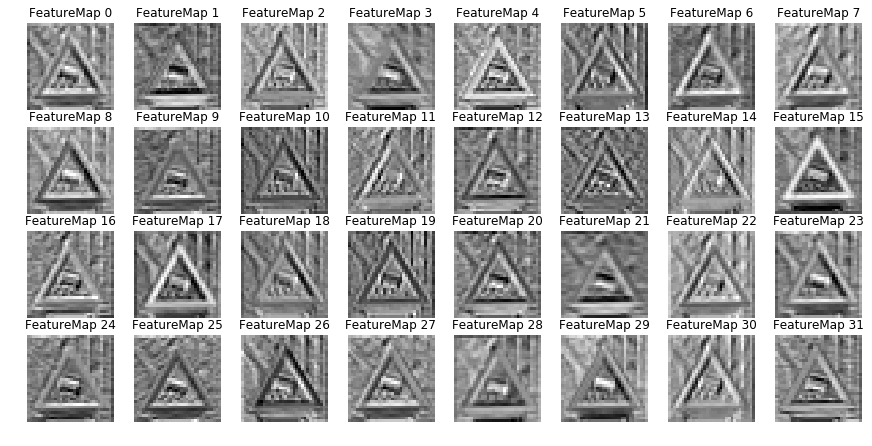

In [46]:
plot_activation(acts0[0])

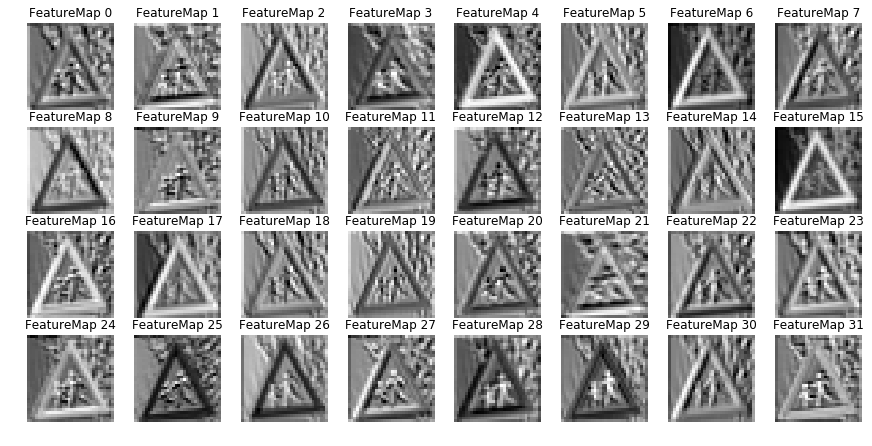

In [47]:
plot_activation(acts1[0])

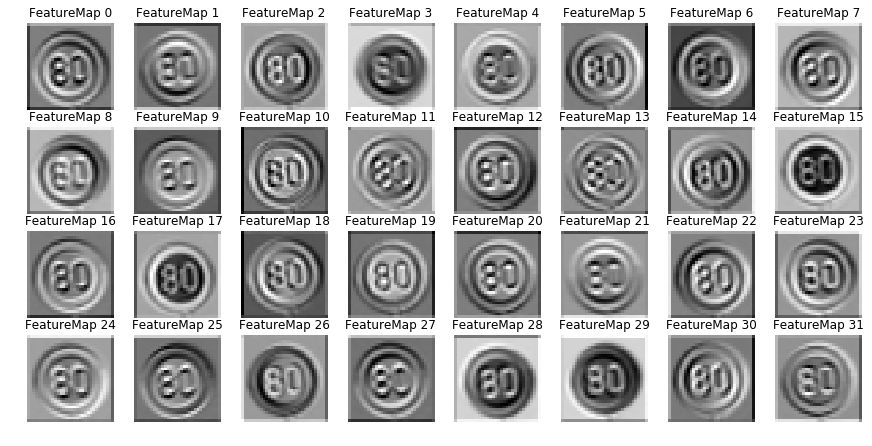

In [48]:
plot_activation(acts2[0])

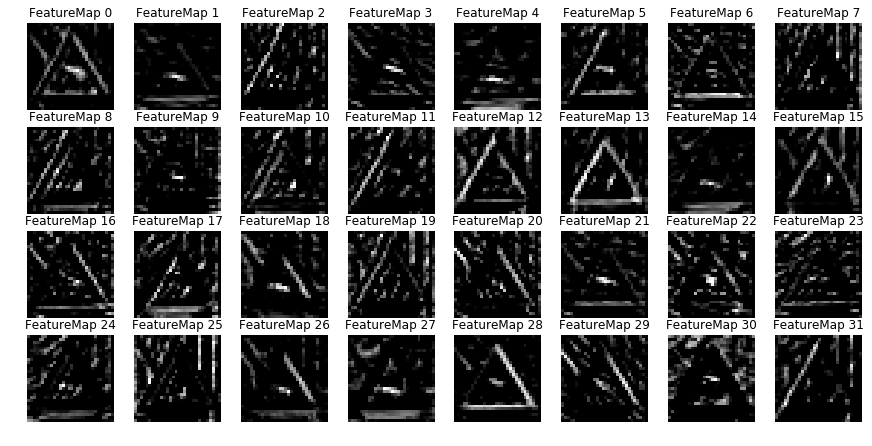

In [49]:
plot_activation(acts0[5])

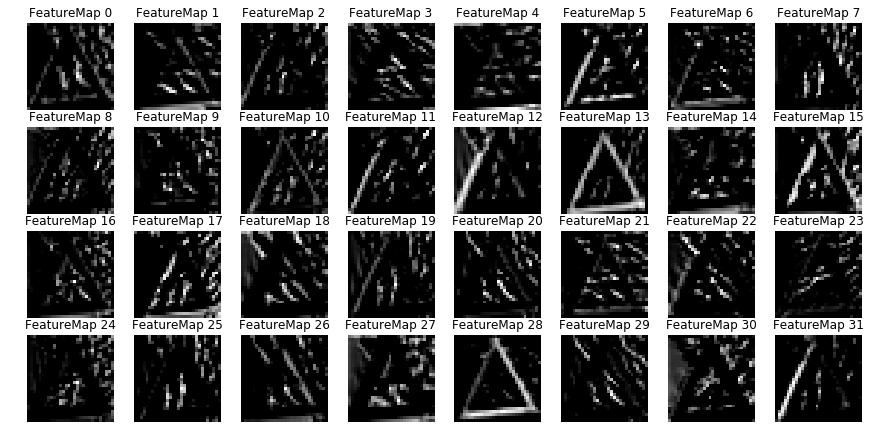

In [50]:
plot_activation(acts1[5])

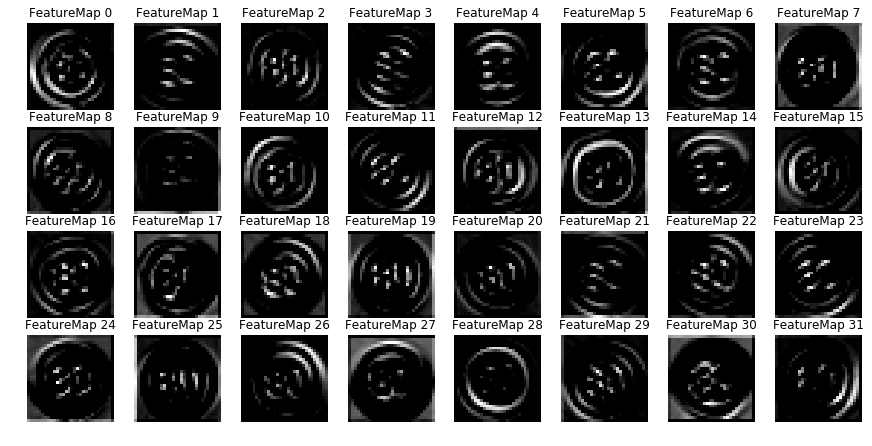

In [51]:
plot_activation(acts2[5])

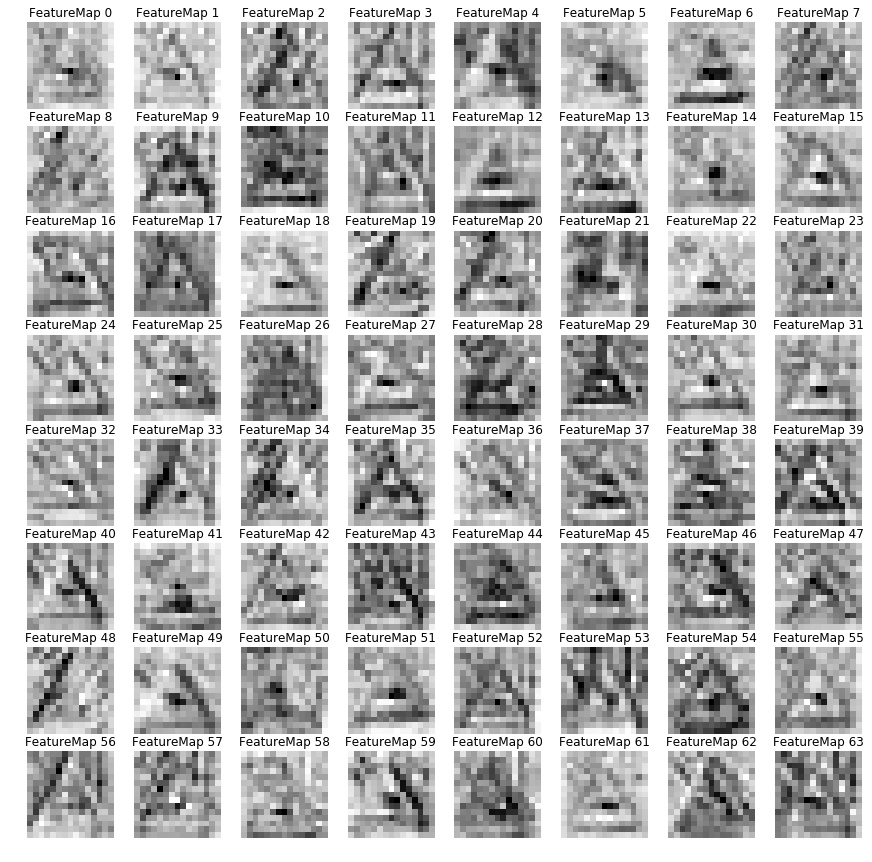

In [52]:
plot_activation(acts0[8])

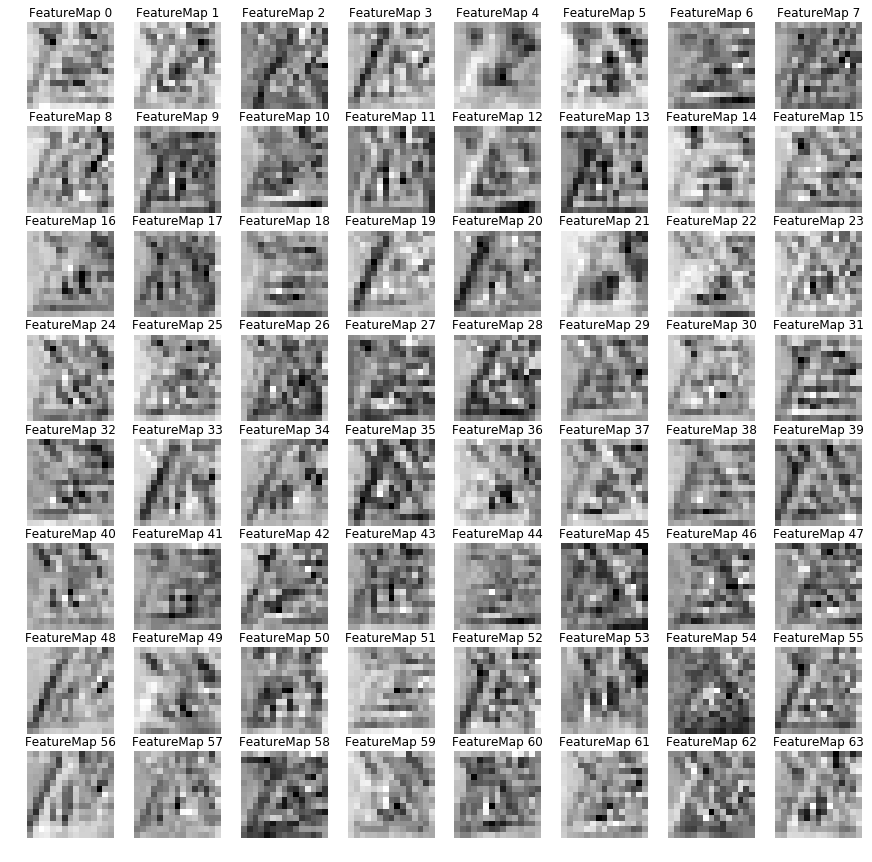

In [53]:
plot_activation(acts1[8])

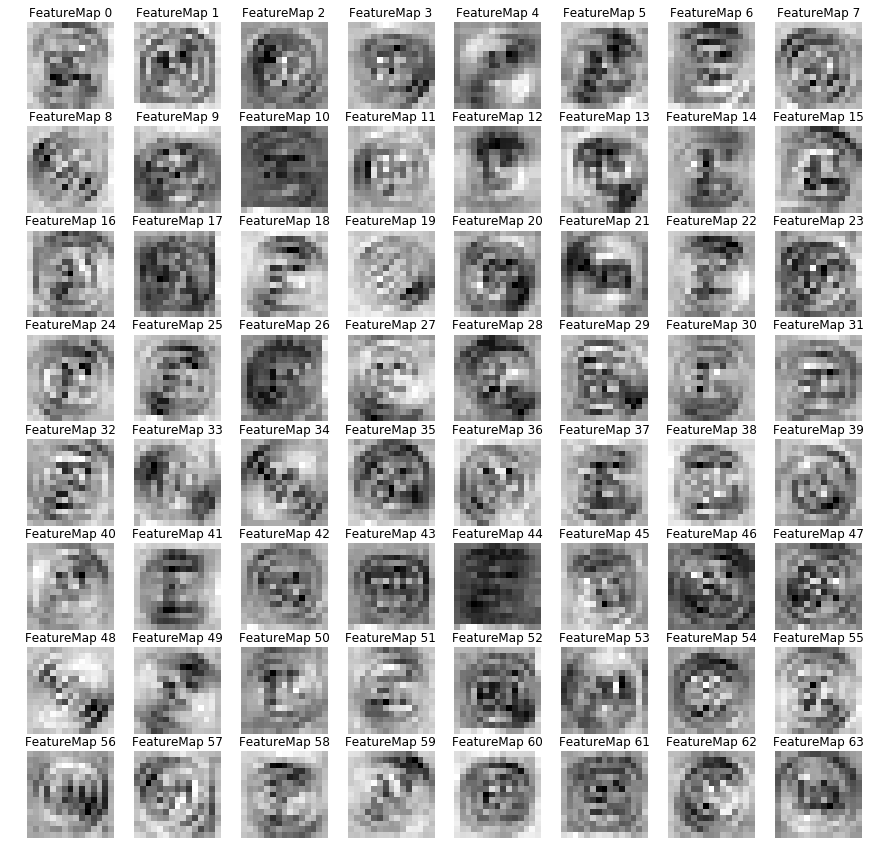

In [54]:
plot_activation(acts2[8])